# Assignment 3: Optimization II

University of California Berkeley

ME C231A, EE C220B, Experiential Advanced Control I

***

These notes were developed by Roya Firoozi and Francesco Borrelli at UC Berkeley. They are protected by U.S. copyright law and by University policy (https://copyright.universityofcalifornia.edu/resources/ownership-course-materials.html).

If you are enrolled in ME C231A/EE C220B you may take notes and make copies of course materials for your own use. You may also share those materials with another student who is registered and enrolled in this course, and with DSP.

You may not reproduce, distribute or display (post/upload) (Links to an external site.) lecture notes or recordings or course materials in any other way — whether or not a fee is charged — without my express written consent. You also may not allow others to do so. If you do so, you may be subject to student conduct proceedings under the Links to an external site.Berkeley Code of Student Conduct, including Sections 102.23 and 102.25.

***

In [2]:
# Please run this cell only if you are using Google Colab. 

# install required dependencies
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
  !pip install -q pyomo
  !apt-get install -y -qq glpk-utils
  !apt-get install -y -qq coinor-cbc
  !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
  !unzip -o -q ipopt-linux64

     |████████████████████████████████| 9.1 MB 5.1 MB/s 
     |████████████████████████████████| 49 kB 5.5 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 155047 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up 

Note: You should now be familiar with $\texttt{cvxopt}$ to solve linear and quadratic programs. For certain problems in this assignment you will need to use a nonlinear solver. You may specify $\texttt{IPOPT}$ as a solver in $\texttt{pyomo}$ which solves constrained, nonlinear programs. 

***

# <font color=blue> 1. Linear and Quadratic Programming: </font>

The following problems include some of the examples from homework 2. This time, use $\texttt{Pyomo}$ to solve them. Please submit your solutions as individual functions for each of the 4 parts. 

These functions should have no inputs and 4 outputs. The first two outputs are logical values indicating the feasibility and  boundedness, where a [1,1] stands for a feasible problem and bounded solution. The third output is the value of the optimizer, which should be an $N\times 1$ vector, where $N$ is the dimension of decision variable. If the problem is infeasible or unbounded, the function should return an empty array here (i.e. $\texttt{zOpt = []}$). The fourth output is the optimal value of the cost function. If the problem is infeasible, the function should return an empty array here. If the problem is unbounded return $\texttt{+inf}$ or $\texttt{-inf}$ here. You can call the function $\texttt{check_solver_status}$ to determine if the problem is feasible/bounded or not.  

In [3]:
import pyomo.environ as pyo
import numpy as np
def check_solver_status(model, results):
    from pyomo.opt import SolverStatus, TerminationCondition
    if (results.solver.status == SolverStatus.ok) and (results.solver.termination_condition == TerminationCondition.optimal):
        print('========================================================================================')
        print('================ Problem is feasible and the optimal solution is found ==================')
        print('z1 optimal=', pyo.value(model.z1))
        print('z2 optimal=', pyo.value(model.z2)) 
        print('optimal value=', pyo.value(model.obj))
        print('========================================================================================')
        bound = True
        feas = True
        zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
        JOpt = pyo.value(model.obj)
    elif (results.solver.termination_condition == TerminationCondition.infeasible):
        print('========================================================')
        print('================ Problem is infeasible ==================')
        print('========================================================')
        feas = False
        zOpt = []
        JOpt = []
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
        else:
            bound = True
        
    else:
        if (results.solver.termination_condition == TerminationCondition.unbounded):
            print('================ Problem is unbounded ==================')
            bound = False
            feas = True
            zOpt = []
            JOpt = np.inf
        else:
            bound = True
            feas = True
            zOpt = []
            JOpt = np.inf
            
    return feas, bound, zOpt, JOpt

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

Write a function $\texttt{LPQPa}$, with function declaration line

`def LPQPa():
    return feas, bound, zOpt, JOpt`
 

then call the function and print the outputs.

### <font color=red> Delivarable 1a: write your answer in the code cell below.</font>

In [4]:
from pyomo.opt import SolverStatus, TerminationCondition
import pyomo.environ as pyo

# Write your code here:
def LPQPa(): 
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()

  model.obj = pyo.Objective(expr = -5*model.z1 - 7*model.z2)
  model.Constraint1 = pyo.Constraint(expr = -3 * model.z1 + 2*model.z2 <= 30)
  model.Constraint2 = pyo.Constraint(expr = -2 * model.z1 + model.z2 <= 12)
  model.Constraint3 = pyo.Constraint(expr = model.z1 >= 0) 
  model.Constraint4 = pyo.Constraint(expr = model.z2 >= 0)

  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  return check_solver_status(model,results)
print(LPQPa())






    model.name="unknown";
      - termination condition: unbounded
      - message from solver: Ipopt 3.12.13\x3a Iterates diverging; problem
        might be unbounded.
================ Problem is unbounded ==================
(True, False, [], inf)


$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0 
\end{align}

Write a function $\texttt{LPQPb}$, with function declaration line

`def LPQPb():
    return feas, bound, zOpt, JOpt`

then call the function and print the outputs.

### <font color=red> Delivarable 1b: write your answer in the code cell below.</font>

In [5]:
# Write your code here:
def LPQPb(): 
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()

  model.obj = pyo.Objective(expr = 3*model.z1 + model.z2)
  model.Constraint1 = pyo.Constraint(expr = model.z1 - model.z2 <= 1)
  model.Constraint2 = pyo.Constraint(expr = 3*model.z1 + 2*model.z2 <= 12)
  model.Constraint3 = pyo.Constraint(expr = 2*model.z1 + 3*model.z2 <= 3) 
  model.Constraint4 = pyo.Constraint(expr = -2*model.z1 + 3*model.z2 >= 9)
  model.Constraint5 = pyo.Constraint(expr = model.z1 >= 0) 
  model.Constraint6 = pyo.Constraint(expr = model.z2 >= 0)

  solver = pyo.SolverFactory('cbc')
  results = solver.solve(model)

  return check_solver_status(model,results)
print(LPQPb())

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: <undefined>
================ Problem is infeasible ==================
(False, True, [], [])


$\textbf{Part (c)}$

\begin{align}
\min \hspace{2mm}&  \| \begin{bmatrix}
z_1             \\[0.3em]
z_2 +5            \\[0.3em]
\end{bmatrix}\|_1 + \|\begin{bmatrix}
z_1-2             \\[0.3em]
z_2             \\[0.3em]
\end{bmatrix}\|_\infty
\nonumber\\
\text{subject to} \hspace{12mm}& 3z_1+2z_2 \leq -3 \nonumber\\
&\hspace{6mm} 0 \leq z_1 \leq 2 \nonumber\\
&\hspace{2mm}-2 \leq z_2 \leq 3 \nonumber
\end{align}

Note: Use the LP reformulation of this problem.

Write a function $\texttt{LPQPc}$, with the following function declaration line, then call the function and print the outputs.

`def LPQPc():
    return feas, bound, zOpt, JOpt`

### <font color=red> Delivarable 1c: write your answer in the code cell below.</font>

In [6]:
# Write your code here:
def LPQPc():
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()
  model.t1 = pyo.Var()
  model.t2 = pyo.Var()
  model.t3 = pyo.Var()

  model.obj = pyo.Objective(expr = model.t1 + model.t2 + model.t3)

  model.Constraint1 = pyo.Constraint(expr = 3*model.z1 + 2*model.z2 <= -3)
  model.Constraint2 = pyo.Constraint(expr = (0, model.z1, 2))
  model.Constraint3 = pyo.Constraint(expr = (-2, model.z2, 3))

  model.Constraint4 = pyo.Constraint(expr = model.t3 >= model.z1-2)
  model.Constraint5 = pyo.Constraint(expr =  -(model.z1-2) <= model.t3)
  model.Constraint6 = pyo.Constraint(expr = model.t3 >= model.z2)
  model.Constraint7 = pyo.Constraint(expr =  -model.z2 <= model.t3)

  model.Constraint8 = pyo.Constraint(expr = model.t1 >= model.z1)
  model.Constraint9 = pyo.Constraint(expr =  -(model.z1) <= model.t1)
  model.Constraint10 = pyo.Constraint(expr = model.t2 >= model.z2+5)
  model.Constraint11 = pyo.Constraint(expr =  -(model.z2+5) <= model.t2)


  solver = pyo.SolverFactory('cbc')
  results = solver.solve(model)

  return check_solver_status(model,results)
print(LPQPc())


================ Problem is feasible and the optimal solution is found ==================
z1 optimal= 0.0
z2 optimal= -2.0
optimal value= 5.0
(True, True, array([ 0., -2.]), 5.0)


$\textbf{Part (d)}$

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \\
\text{s.t. } & z_1 \leq -3 \\
& z_2 \leq 4\\
& 0 \geq 4z_1+3z_2  
\end{align}

Write a function $\texttt{LPQPd}$, with the following function declaration line, then call the function and print the outputs.

`def LPQPd():
    return feas, bound, zOpt, JOpt`

### <font color=red> Delivarable 1d: write your answer in the code cell below.</font>

In [7]:
# Write your code here:
def LPQPd(): 
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()
  a = (model.z1)**2
  b = (model.z2)**2

  model.obj = pyo.Objective(expr = a + b)
  model.Constraint1 = pyo.Constraint(expr = -3 >= model.z1)
  model.Constraint2 = pyo.Constraint(expr = 4 >= model.z2)
  model.Constraint3 = pyo.Constraint(expr = 4*model.z1 + 3*model.z2 <= 0) 
  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  return check_solver_status(model,results)

print(LPQPd())



================ Problem is feasible and the optimal solution is found ==================
z1 optimal= -2.9999999704176505
z2 optimal= -6.265025272784229e-10
optimal value= 8.999999822505904
(True, True, array([-2.99999997e+00, -6.26502527e-10]), 8.999999822505904)


# <font color=blue> 2. Nonlinear Programming I: </font>

$\textbf{Part (a)}$

Write a function $\texttt{NLP1}$, which solves the optimization problem defined below using $\texttt{pyomo}$, with function declaration line

`def NLP1(z0):
    return zOpt, JOpt`

where the input $\texttt{z0}$ is the initial guess for your optimizer. The function should have 2 outputs. $\texttt{zOpt}$ is the optimizer and $\texttt{JOpt}$ is the optimal cost. Also, call the function and print the outputs.

\begin{align}
\min_{z_1,z_2}~ & 3\sin(-2\pi z_1)+2z_1+4+\cos(2\pi z_2)+z_2 \\
\text{s.t. } &-1 \leq z_1 \leq 1 \\
&-1 \leq z_2 \leq 1
\end{align}

### <font color=red> Delivarable 2a: write your answer in the code cell below.</font>

In [8]:
# Write your code here:
import numpy as np
import pyomo.environ as pyo
from pyomo.opt import SolverStatus, TerminationCondition

z0 = [1,1]
def NLP1(z0=[]):
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var(initialize = z0[0])
  model.z2 = pyo.Var(initialize = z0[1])
  model.obj = pyo.Objective(expr = 3*pyo.sin(-2*np.pi*model.z1)+ 2*model.z1 + 4 + pyo.cos(2*np.pi*model.z2) + model.z2)
  model.constraint1 = pyo.Constraint(expr = (-1, model.z1, 1))
  model.constraint2 = pyo.Constraint(expr = (-1, model.z2, 1))
  # model.constraint2 = pyo.Constraint(expr = pyo.inequality(-1, model.z2, 1))  #This line and the above line are equivalent. 
  # Range inequlities can be represented using both the above syntaxes.

  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)
  print('Initialization = ', np.array(z0))
  print('zOpt = ', np.array([pyo.value(model.z1), pyo.value(model.z2)]))
  print('JOpt = ', pyo.value(model.obj))
  return np.array([pyo.value(model.z1), pyo.value(model.z2), pyo.value(model.obj)])
print(NLP1(z0))



Initialization =  [1 1]
zOpt =  [1.00000001 0.47456153]
JOpt =  5.48730774624032
[1.00000001 0.47456153 5.48730775]


$\textbf{Part (b)}$

Show the outputs of your function $\texttt{NLP1}$ for 10 random initial guesses, drawing them from a uniform random distribution over $\left[-1, 1\right]$ across your feasible set.

### <font color=red> Delivarable 2b: write your answer in the code cell below.</font>

In [9]:
# Write your code here:
z1 = []
z2 = []
J = []
intz1 = []
intz2 = []
solver = pyo.SolverFactory('ipopt')

for _ in range(10):
    z1_init = np.random.uniform(low = -1.0, high = 1.0)
    z2_init = np.random.uniform(low = -1.0, high = 1.0)
    model = pyo.ConcreteModel()
    model.z1 = pyo.Var(initialize = z1_init)
    model.z2 = pyo.Var(initialize = z2_init)
    model.obj = pyo.Objective(expr = 3*pyo.sin(-2*np.pi*model.z1) + 2*model.z1 + 4 + pyo.cos(2*np.pi*model.z2) + model.z2)
    model.constraint1 = pyo.Constraint(expr = (-1, model.z1, 1))
    model.constraint2 = pyo.Constraint(expr = (-1, model.z2, 1))
    results = solver.solve(model)
    zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
    JOpt = pyo.value(model.obj)
    z1.append(zOpt[0])
    z2.append(zOpt[1])
    J.append(JOpt)
    intz1.append(z1_init)
    intz2.append(z2_init)
    
print('z1Opt=', z1)
print('z2Opt=', z2)
print('opt_value=', J)


z1Opt= [0.2330812893159912, 0.2330812893159912, 0.2330812893159912, -0.7669187105942515, -0.7669187105942515, 1.0000000098512716, 0.2330812893159912, -0.7669187105942515, 1.0000000098512716, -0.7669187105942515]
z2Opt= [-0.5254384707730885, -0.5254384707730885, -0.5254384707730885, -0.5254384707730885, -0.5254384707730885, -0.5254384707730885, -0.5254384707730885, 0.4745615290547882, 0.47456152905478827, -0.5254384707730885]
opt_value= [-0.029594848052550193, -0.029594848052550193, -0.029594848052550193, -2.02959484805255, -2.02959484805255, 4.487307746240321, -0.029594848052550193, -1.0295948480525496, 5.48730774624032, -2.02959484805255]


$\textbf{Part (c)}$

Print out a plot of the cost function contour, mark out the initial guesses from Part (b) and the optimal solutions. Finally, by using a 3D plot show whether the obtained solutions are global or local optima. Provide printed plots as well as your code.

### <font color=red> Delivarable 2c: write your answer in the code cells below.</font>

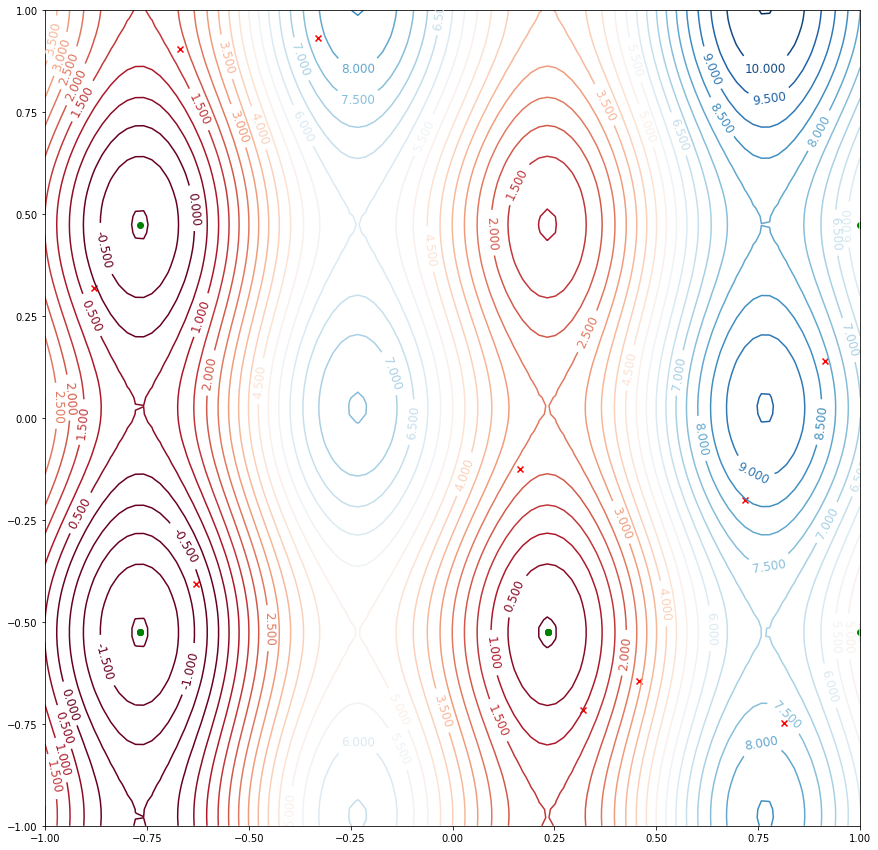

In [10]:
import matplotlib.pyplot as plt
# Contour plot

# Write your code here:
z1_opt = z1
z2_opt = z2

fig, ax = plt.subplots(figsize=(15,15))
z = np.linspace(-1, 1, 100)
z1, z2 = np.meshgrid(z, z)
C = 3*np.sin(-2*np.pi*z1)+ 2*z1 + 4 + np.cos(2*np.pi*z2) + z2
CS = ax.contour(z1, z2, C, cmap=plt.cm.RdBu, vmin=abs(C).min(), vmax=abs(C).max(), levels=30)
ax.clabel(CS, inline=1, fontsize=12)
ax.axis('square')
ax.scatter(np.asarray(z1_opt), np.asarray(z2_opt) , c='g', marker='o')
ax.scatter(intz1, intz2 , c='r', marker='x')
plt.show()

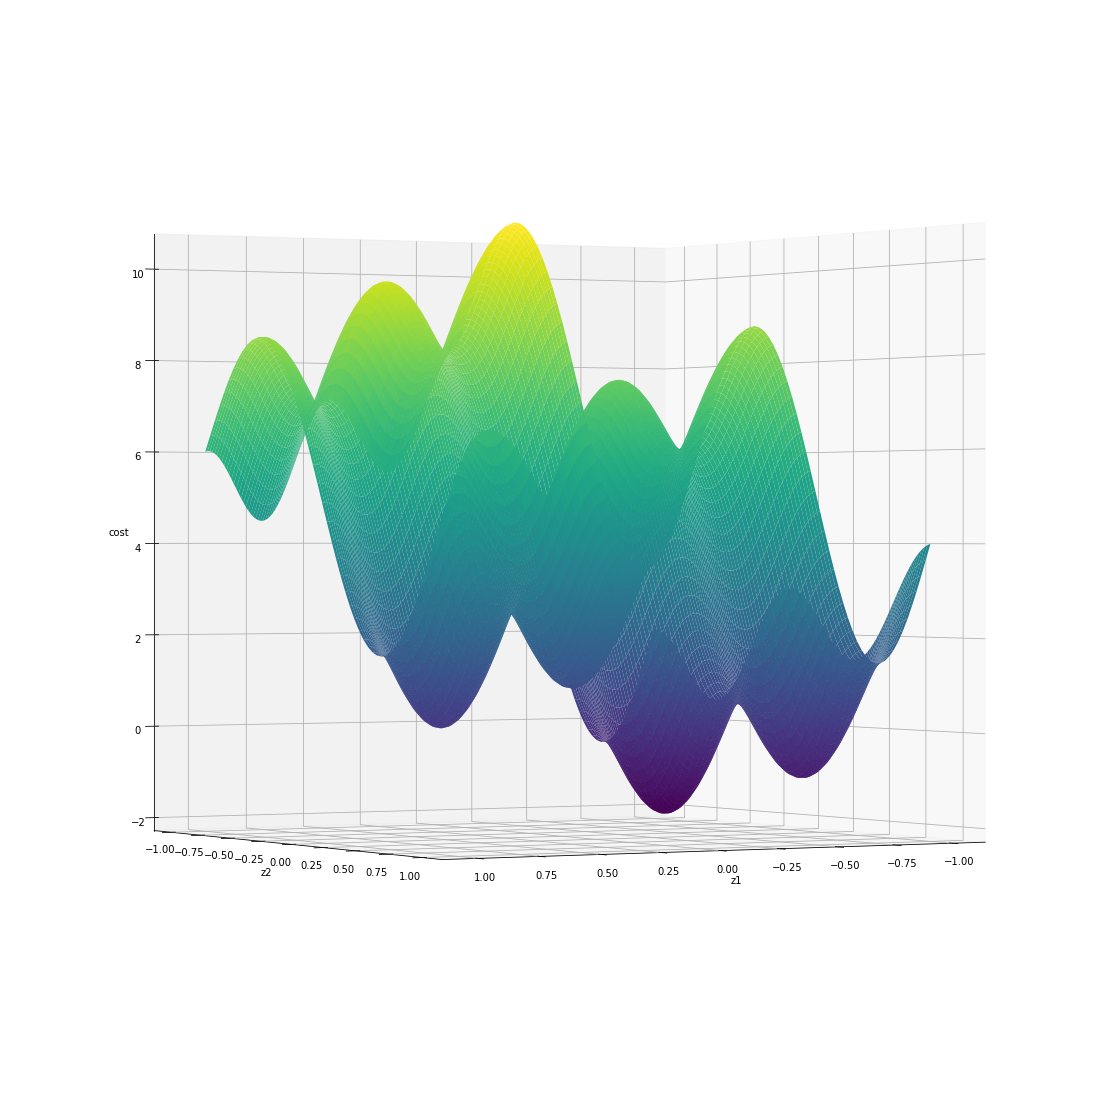

In [11]:
from mpl_toolkits.mplot3d import Axes3D
# 3D plot

# Write your code here:
z1_opt = z1
z2_opt = z2

fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
z = np.linspace(-1,1,100)
z1, z2 = np.meshgrid(z, z)
C = 3*np.sin(-2*np.pi*z1)+ 2*z1 + 4 + np.cos(2*np.pi*z2) + z2
ax.plot_surface(z1,z2,C,rstride=1,cstride =1,cmap='viridis')
ax.view_init(0,60)

ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('cost')
plt.show()

***

# <font color=blue> 3. Nonlinear Programming II </font>

Using $\texttt{pyomo}$, repeat all parts of Problem 3 but with the optimization problem defined below. Write a function $\texttt{NLP2}$ with function declaration line

`def NLP2(z0):
    return zOpt, JOpt`

\begin{align}
\min_{z_1,z_2}~ & \log(1+z_1^2)-z_2 \\
\text{s.t. } &-(1+z_1^2)^2+z_2^2 = 4 
\end{align}

$\textbf{Part (a)}$

Repeat part (a) of problem 2.

### <font color=red> Delivarable 3a: write your answer in the code cell below.</font>

In [12]:
import numpy as np
import pyomo.environ as pyo

# Write your code here:
def NLP2(Z0 = []):
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var(initialize = z0[0])
  model.z2 = pyo.Var(initialize = z0[1])


  model.obj = pyo.Objective(expr = pyo.log(1+model.z1**2)- model.z2)

  model.constraint1 = pyo.Constraint(expr = -( 1 + model.z1**2)**2 + model.z2**2 == 4)

  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)
  print('Initialization = ', np.array(z0))
  print('zOpt = ', np.array([pyo.value(model.z1), pyo.value(model.z2)]))
  print('JOpt = ', pyo.value(model.obj))
  return np.array([pyo.value(model.z1), pyo.value(model.z2), pyo.value(model.obj)])
print(NLP2([1,1]))


Initialization =  [1 1]
zOpt =  [1.45361022e-09 2.23606798e+00]
JOpt =  -2.236067976212036
[ 1.45361022e-09  2.23606798e+00 -2.23606798e+00]


$\textbf{Part (b)}$

Repeat part (b) of problem 2.

### <font color=red> Delivarable 3b: write your answer in the code cell below.</font>

In [26]:
# Write your code here:
z1 = []
z2 = []
J = []
intz1 = []
intz2 = []
solver = pyo.SolverFactory('ipopt')

for _ in range(10):
  z1_init = np.random.uniform(low = -1.0, high = 1.0)
  #z2_init = np.random.uniform(low = -1.0, high = 1.0)
  z2_init = np.sqrt(4+((1+z1_init**2)**2))
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var(initialize = z1_init)
  model.z2 = pyo.Var(initialize = z2_init)

  model.obj = pyo.Objective(expr = pyo.log(1+model.z1**2)- model.z2)
    
  model.constraint1 = pyo.Constraint(expr = -( 1 + model.z1**2)**2 + model.z2**2 == 4)

  results = solver.solve(model)
  zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
  JOpt = pyo.value(model.obj)
  z1.append(zOpt[0])
  z2.append(zOpt[1])
  J.append(JOpt)
  intz1.append(z1_init)
  intz2.append(z2_init)
  

print('z1Opt=', z1)
print('z2Opt=', z2)
print('opt_value=', J)

z1Opt= [1.1382505450389409e-12, 1.6914838578868706e-11, 1.0222891925610129e-17, -4.1138332926678655e-09, 1.746496612899085e-11, -1.2773889256333928e-12, -8.884863897412636e-12, -3.349258226309623e-11, -4.82536593351241e-12, -7.068902064651865e-11]
z2Opt= [2.2360679774988252, 2.236067977411279, 2.23606797749979, 2.236067977437997, 2.2360679774186694, 2.236067977498313, 2.23606797752271, 2.236067977475245, 2.2360679774937635, 2.236067977968339]
opt_value= [-2.2360679774988252, -2.236067977411279, -2.23606797749979, -2.236067977437997, -2.2360679774186694, -2.236067977498313, -2.23606797752271, -2.236067977475245, -2.2360679774937635, -2.236067977968339]


$\textbf{Part (c)}$

Repeat part (c) of problem 2, but draw only $z_1$ from a uniform random distribution over $\left[-1, 1\right]$.

### <font color=red> Delivarable 3c: write your answer in the code cells below.</font>

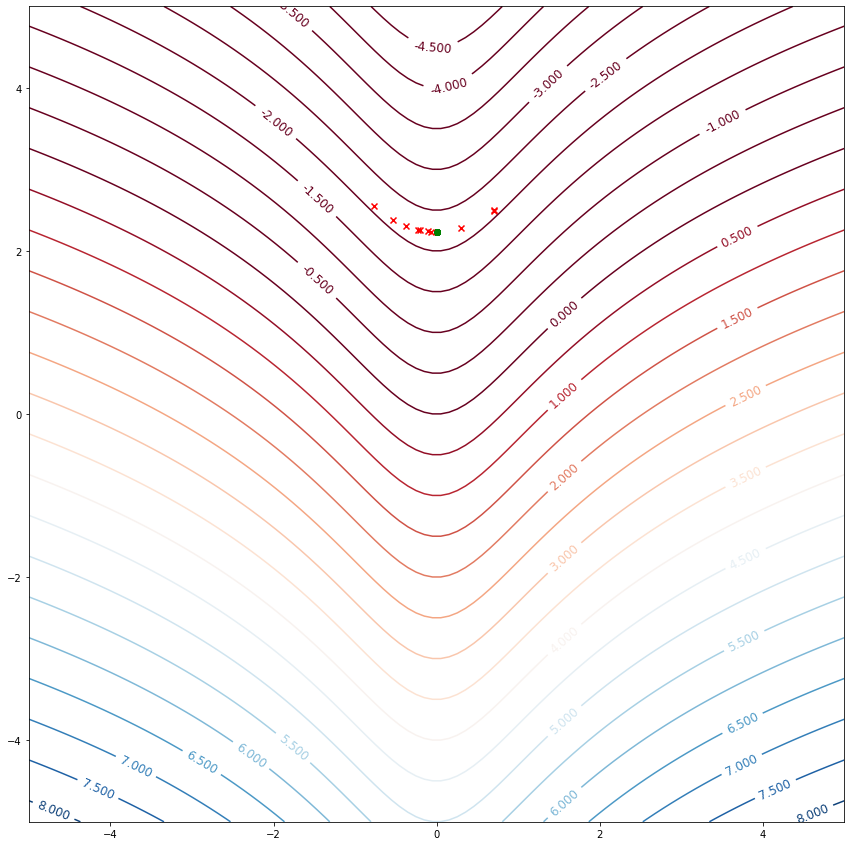

In [27]:
import matplotlib.pyplot as plt
# Contour plot

# Write your code here:

z1_opt = z1
z2_opt = z2

fig, ax = plt.subplots(figsize=(15,15))
z = np.linspace(-5, 5, 100)
z1, z2 = np.meshgrid(z, z)
C = np.log(1+z1**2)- z2
CS = ax.contour(z1, z2, C, cmap=plt.cm.RdBu, vmin=abs(C).min(), vmax=abs(C).max(), levels=30)
ax.clabel(CS, inline=1, fontsize=12)
ax.axis('square')
ax.scatter(np.asarray(z1_opt), np.asarray(z2_opt) , c='g', marker='o')
ax.scatter(intz1, intz2 , c='r', marker='x')
plt.show()

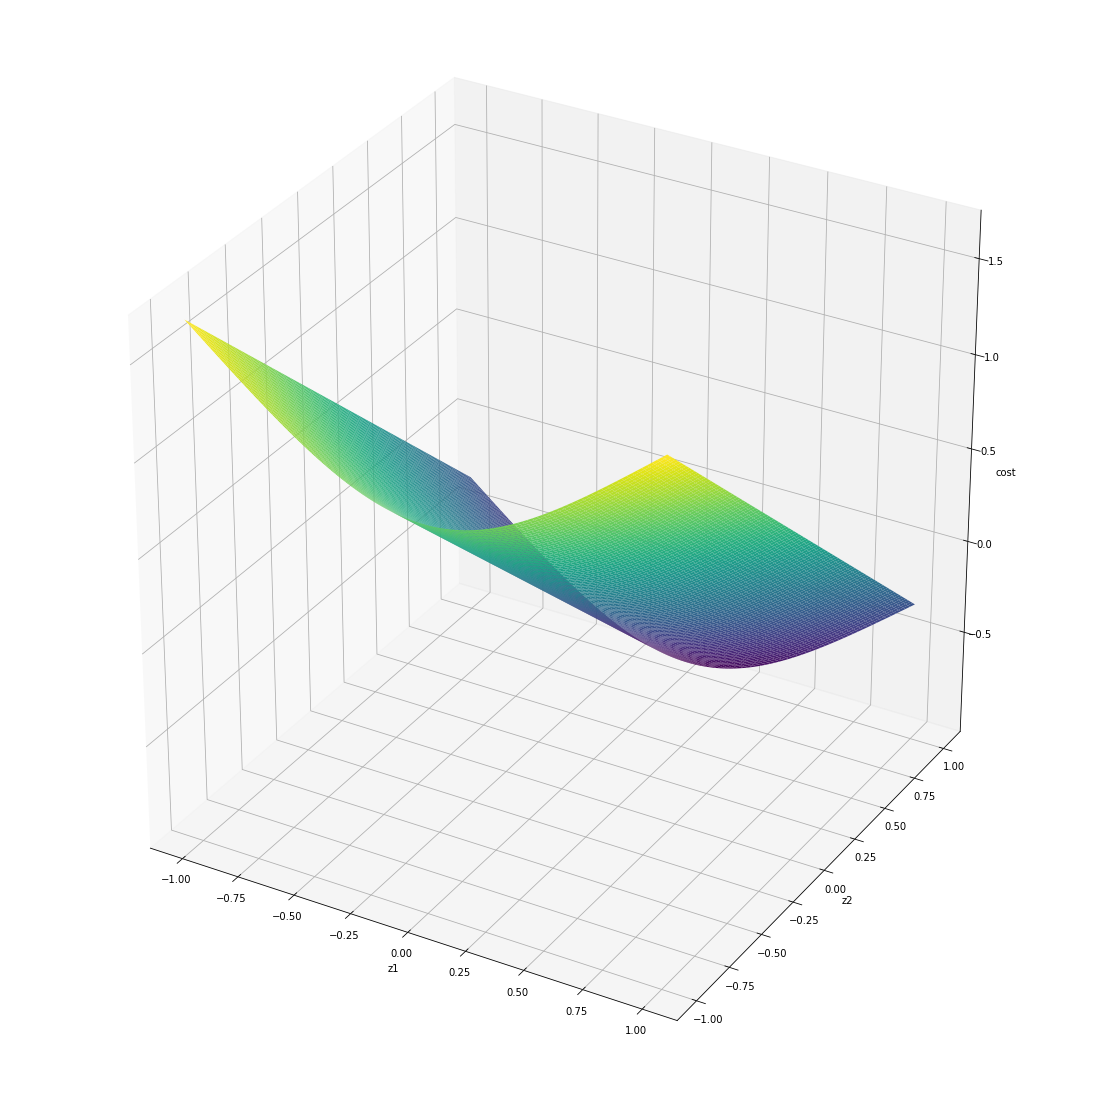

In [15]:
from mpl_toolkits.mplot3d import Axes3D
# 3D plot
z1_opt = z1
z2_opt = z2
# Write your code here:
fig = plt.figure(figsize=(15,15))
ax = Axes3D(fig)
z = np.linspace(-1,1,100)
z1, z2 = np.meshgrid(z, z)
C = np.log(1+z1**2)- z2
ax.plot_surface(z1,z2,C,rstride=1,cstride =1,cmap='viridis')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('cost')

plt.show()

***

# <font color=blue> 4. Mixed-integer Programming </font>

Use $\texttt{pyomo}$ to solve the two following optimization problems. Write individual functions for each optimization problem.

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ & -6z_1-5z_2 \\
\text{s.t. } & z_1+4z_2 \leq 16 \\
& 6z_1+4z_2 \leq 28\\
& 2z_1-5z_2 \leq 6\\
& 0 \leq z_1 \leq 10\\
& 0 \leq z_2 \leq 10 \\
& z_1, z_2 \in \textbf{Z},\text{(integer)}
\end{align}

Write a function $\texttt{MIPa}$, with function declaration line

`def MIPa():
    return zOpt, JOpt`

then call the function and print the outputs.

$\textit{Hint:}$ Use $\texttt{pyo.Integers}$ to define integer decision variables.

### <font color=red> Delivarable 4a: write your answer in the code cell below.</font>

In [16]:
# Write your code here:
def MIPa():
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var(within = pyo.Integers)
  model.z2 = pyo.Var(within = pyo.Integers)

  model.obj = pyo.Objective(expr = -6*model.z1-5*model.z2)
  model.constraint1 = pyo.Constraint(expr = model.z1 + 4*model.z2 <= 16)
  model.constraint2 = pyo.Constraint(expr = 6*model.z1 + 4*model.z2 <= 28)
  model.constraint3 = pyo.Constraint(expr = 2*model.z1 - 5*model.z2 <= 6)
  model.constraint4 = pyo.Constraint(expr = (0, model.z1, 10))
  model.constraint5 = pyo.Constraint(expr = (0, model.z2, 10))
  model.constraint6 = pyo.Constraint(expr = model.z1>=0)
  model.constraint7 = pyo.Constraint(expr = model.z2>=0)

  solver = pyo.SolverFactory('glpk')
  results = solver.solve(model)
  print('zOpt = ', np.array([pyo.value(model.z1), pyo.value(model.z2)]))
  print('JOpt = ', pyo.value(model.obj))
  return np.array([pyo.value(model.z1), pyo.value(model.z2), pyo.value(model.obj)])

print(MIPa())
  

zOpt =  [4. 1.]
JOpt =  -29.0
[  4.   1. -29.]


$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & -z_1-2z_2 \\
\text{s.t. } & \text{either } 3z_1+4z_2 \leq 12~~ \text{or } 4z_1+3z_2 \leq 12\\
& z_1\geq0\\
& z_2\geq0
\end{align}

Write a function $\texttt{MIPb}$, with function declaration line

`def MIPb():
    return zOpt, JOpt`

then call the function and print the outputs.

$\textit{Hint:}$ Use $\texttt{pyo.Var(within=pyo.Binary)}$ to define integer decision variables in $\texttt{Pyomo}$.

### <font color=red> Delivarable 4b: write your answer in the code cell below.</font>

In [17]:
# Write your code here:
def MIPb():
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var() 
  model.h = pyo.Var(within = pyo.Binary)
  model.obj = pyo.Objective(expr = -model.z1-2*model.z2)
  model.constraint1 = pyo.Constraint(expr = 3*model.z1 + 4*model.z2 <= 12 + model.h*999999)
  model.constraint2 = pyo.Constraint(expr = 4*model.z1 + 3*model.z2 <= 12 + (1-model.h)*999999)
  model.constraint3 = pyo.Constraint(expr = model.z1>=0)
  model.constraint4 = pyo.Constraint(expr = model.z2>=0)

  solver = pyo.SolverFactory('glpk')
  results = solver.solve(model)
  print('zOpt = ', np.array([pyo.value(model.z1), pyo.value(model.z2)]))
  print('JOpt = ', pyo.value(model.obj))
  return np.array([pyo.value(model.z1), pyo.value(model.z2), pyo.value(model.obj)])

print(MIPb())


zOpt =  [5.09317033e-11 4.00000000e+00]
JOpt =  -8.000000000050932
[ 5.09317033e-11  4.00000000e+00 -8.00000000e+00]


***

# <font color = blue> 5. KKT Conditions I </font>

The following problems also include some of the examples from Homework 2. Write functions that return a single logical variable that reflects whether all KKT conditions are satisfied for the constrained problem (i.e., 1 stands for all KKT conditions satisfied). Please submit your solutions as individual functions for each of the 4 parts. 

$\textbf{Part (a)}$

\begin{align}
\min_{z_1,z_2}~ &  -5z_1 -7z_2  \nonumber\\
\text{s.t. } & -3z_1 +2z_2 \leq 30  \nonumber\\
& -2z_1 + z_2 \leq 12  \nonumber\\
& z_1 \geq 0  \nonumber\\
& z_2 \geq 0  \nonumber
\end{align}

Write a function $\texttt{LPQPkkta}$, with function declaration line

`def LPQPkkta():
    return KKTsat`

then call the function and print the output.

### <font color=red> Delivarable 5a: write your answer in the code cell below.</font>

In [18]:
# Write your code here:
import numpy as np
import pyomo.environ as pyo
from pyomo.opt import SolverStatus, TerminationCondition


def LPQPkkta():
  threshold = 1e-5
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()

  model.obj = pyo.Objective(expr = -5*model.z1 - 7*model.z2)
  model.Constraint1 = pyo.Constraint(expr = -3*model.z1 + 2*model.z2 <= 30)
  model.Constraint2 = pyo.Constraint(expr = -2*model.z1 + model.z2 <= 12)
  model.Constraint3 = pyo.Constraint(expr = model.z1 >= 0)
  model.Constraint4 = pyo.Constraint(expr = model.z2 >= 0)

  model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  # print('dual 1:', model.dual[model.Constraint1])
  # print('dual 2:', model.dual[model.Constraint2])
  # print('dual 3:', model.dual[model.Constraint3])
  # print('dual 4:', model.dual[model.Constraint4])
  # print('z1*_solver =', pyo.value(model.z1))
  # print('z2*_solver =', pyo.value(model.z2))
  # print('opt_value =', pyo.value(model.Obj))

  if results.solver.termination_condition != TerminationCondition.optimal:
    KKTsat = False
  else:
    A = np.array([-3,2],[-2,1],[-1,0],[0,-1])
    b = np.array([30,12,0,0])
    zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
    
    u = []
    for c in model.component_objects(pyo.Constraint, active=True):
        print ("Constraint", c)
        for index in c:
            u.append(-model.dual[c[index]]) # The duals in pyomo are defined as -u<=0, so we add a negative sign.
            print(model.dual[c[index]])
    u = np.asarray(u)
    for i in range(len(u)):
        if (u[i] < threshold) & (u[i] > -threshold):
            u[i] = 0 
            
# Checking KKT Conditions: 
    flag_primal = np.all(A@zOpt <= b + threshold)   #  A@zOpt <= b primal feasibility 
    flag_dual = np.all(u >= 0)     # dual feasibility 
    flag_cs = np.all(np.multiply(u,(A@zOpt-b)) < threshold) & np.all(np.multiply(u,(A@zOpt-b)) > -threshold)  # complementary slackness u1*g1 = 0, u2*g2=0
    grad_lagrangian = [-5,-7] + u.T@A
    
    for i in range(len(grad_lagrangian)):
        if (grad_lagrangian[i] < threshold) & (grad_lagrangian[i] > -threshold):  # gradient of Lagragian evaluated at optimizer point must be zero.    
            grad_lagrangian[i] = 0
    flag_grad = np.all(grad_lagrangian == 0)
    KKT_conditions = np.array([flag_primal, flag_dual, flag_cs, flag_grad])
    if all(KKT_conditions == 1):
        KKTsat = True
    else:
        KKTsat = False  
    return KKTsat
  
print(bool(LPQPkkta()))    
     



  


    model.name="unknown";
      - termination condition: unbounded
      - message from solver: Ipopt 3.12.13\x3a Iterates diverging; problem
        might be unbounded.
False


$\textbf{Part (b)}$

\begin{align}
\min_{z_1,z_2}~ & 3z_1 + z_2  \\
\text{s.t. } & z_1 - z_2 \leq 1  \\
& 3z_1 + 2z_2 \leq 12  \\
& 2z_1 + 3z_2 \leq 3  \\
& -2z_1 +3z_2 \geq 9  \\
& z_1 \geq 0  \\
& z_2 \geq 0 
\end{align}

Write a function $\texttt{LPQPkktb}$, with function declaration line

`def LPQPkktb():
    return KKTsat`

then call the function and print the outputs.

### <font color=red> Delivarable 5b: write your answer in the code cell below.</font>

In [19]:
# Write your code here:
def LPQPkktb():
  threshold = 1e-5
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()

  model.obj = pyo.Objective(expr = 3*model.z1 + model.z2)
  model.Constraint1 = pyo.Constraint(expr = model.z1 - model.z2 <= 1)
  model.Constraint2 = pyo.Constraint(expr = 3*model.z1 + 2*model.z2 <= 12)
  model.Constraint3 = pyo.Constraint(expr = 2*model.z1 + 3*model.z2 <= 3)
  model.Constraint4 = pyo.Constraint(expr = -2*model.z1 + 3*model.z2 >= 9)
  model.Constraint5 = pyo.Constraint(expr = model.z1 >= 0)
  model.Constraint6 = pyo.Constraint(expr = model.z2 >= 0)

  model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  if results.solver.termination_condition != TerminationCondition.optimal:
    KKTsat = False
  else:
    A = np.array([1,-1],[3,2],[2,3],[2,-3],[-1,0],[0,-1])
    b = np.array([1,12,3,-9,0,0])
    zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
    
    u = []
    for c in model.component_objects(pyo.Constraint, active=True):
        print ("Constraint", c)
        for index in c:
            u.append(-model.dual[c[index]]) # The duals in pyomo are defined as -u<=0, so we add a negative sign.
            print(model.dual[c[index]])
    u = np.asarray(u)
    for i in range(len(u)):
        if (u[i] < threshold) & (u[i] > -threshold):
            u[i] = 0 
            
# Checking KKT Conditions: 
    flag_primal = np.all(A@zOpt <= b + threshold)   #  A@zOpt <= b primal feasibility 
    flag_dual = np.all(u >= 0)     # dual feasibility 
    flag_cs = np.all(np.multiply(u,(A@zOpt-b)) < threshold) & np.all(np.multiply(u,(A@zOpt-b)) > -threshold)  # complementary slackness u1*g1 = 0, u2*g2=0
    grad_lagrangian = [3,1] + u.T@A
    
    for i in range(len(grad_lagrangian)):
        if (grad_lagrangian[i] < threshold) & (grad_lagrangian[i] > -threshold):  # gradient of Lagragian evaluated at optimizer point must be zero.    
            grad_lagrangian[i] = 0
    flag_grad = np.all(grad_lagrangian == 0)
    KKT_conditions = np.array([flag_primal, flag_dual, flag_cs, flag_grad])
    if all(KKT_conditions == 1):
        KKTsat = True
    else:
        KKTsat = False  
    return KKTsat

  
print(bool(LPQPkktb()))    


    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
False


$\textbf{Part (c)}$

\begin{align}
\min_{z_1,z_2}~ & z_1^2 + z_2^2 \nonumber\\
\text{s.t. } & z_1 \leq -3 \nonumber\\
& z_2 \leq 4 \nonumber\\
& 0 \geq 4z_1+3z_2  \nonumber
\end{align}

Write a function $\texttt{LPQPkktc}$, with function declaration line

`def LPQPkktc():
    return KKTsat`

then call the function and print the outputs.

### <font color=red> Delivarable 5c: write your answer in the code cell below.</font>

In [20]:
# Write your code here:
def LPQPkktc():
  threshold = 1e-5
  model = pyo.ConcreteModel()
  model.z1 = pyo.Var()
  model.z2 = pyo.Var()
  
  model.obj = pyo.Objective(expr = (model.z1)**2 + (model.z2)**2)
  model.Constraint1 = pyo.Constraint(expr = model.z1 <= -3)
  model.Constraint2 = pyo.Constraint(expr = model.z2 <= 4)
  model.Constraint3 = pyo.Constraint(expr = 0 >= 4*model.z1 + 3*model.z2)

  model.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)
  solver = pyo.SolverFactory('ipopt')
  results = solver.solve(model)

  if results.solver.termination_condition != TerminationCondition.optimal:
    KKTsat = False
  else:
    A = np.array([[1,0],[0,1],[4,3]])
    #A = np.array([1,0,0,1,4,3]).reshape((3, 2))
    b =  np.array([-3,4,0])
    #b = np.array([-3,4,0]).T
    zOpt = np.array([pyo.value(model.z1), pyo.value(model.z2)])
    
    u = []
    for c in model.component_objects(pyo.Constraint, active=True):
        print ("Constraint", c)
        for index in c:
            u.append(-model.dual[c[index]]) # The duals in pyomo are defined as -u<=0, so we add a negative sign.
            print(model.dual[c[index]])
    u = np.asarray(u)
    for i in range(len(u)):
        if (u[i] < threshold) & (u[i] > -threshold):
            u[i] = 0 
            
# Checking KKT Conditions: 
    flag_primal = np.all(A@zOpt <= b + threshold)   #  A@zOpt <= b primal feasibility 
    flag_dual = np.all(u >= 0)     # dual feasibility 
    flag_cs = np.all(np.multiply(u,(A@zOpt-b)) < threshold) & np.all(np.multiply(u,(A@zOpt-b)) > -threshold)  # complementary slackness u1*g1 = 0, u2*g2=0
    grad_lagrangian = [2*zOpt[0],2*zOpt[1]] + u.T@A
    
    for i in range(len(grad_lagrangian)):
        if (grad_lagrangian[i] < threshold) & (grad_lagrangian[i] > -threshold):  # gradient of Lagragian evaluated at optimizer point must be zero.    
            grad_lagrangian[i] = 0
    flag_grad = np.all(grad_lagrangian == 0)
    KKT_conditions = np.array([flag_primal, flag_dual, flag_cs, flag_grad])
    if all(KKT_conditions == 1):
        KKTsat = True
    else:
        KKTsat = False  
    print(KKT_conditions)
    return KKTsat


print(bool(LPQPkktc()))  



Constraint Constraint1
-5.999999939999967
Constraint Constraint2
-6.265039564695445e-10
Constraint Constraint3
-2.0883369936244261e-10
[ True  True  True  True]
True


***